# Running Grover's algorithm

Grover's algorithm requires the repeated application of an Oracle operator followed by a diffusion operator.

![image](grover.png)

In [1]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Operator
from qiskit.visualization import *

In [2]:
def get_oracle_circuit(indices_to_mark, nqubits):
    thiscircuit = QuantumCircuit(nqubits, name='Orac')
    mtx_ret = np.identity(2**nqubits)
    for index_to_mark in indices_to_mark:
        mtx_ret[index_to_mark, index_to_mark] = -1
    thiscircuit.unitary(Operator(mtx_ret), range(nqubits))
    return thiscircuit

In [3]:
def get_diffusion_circuit(nqubits):
    thiscircuit = QuantumCircuit(nqubits, name='Diff')
    mtx_ret = 1*np.identity(2**nqubits)
    mtx_ret[0, 0] = -1
    thiscircuit.h(range(nqubits))
    thiscircuit.unitary(Operator(mtx_ret), range(nqubits))
    thiscircuit.h(range(nqubits))
    return thiscircuit

5 qubits, basis state indices [27] marked, 4 trials


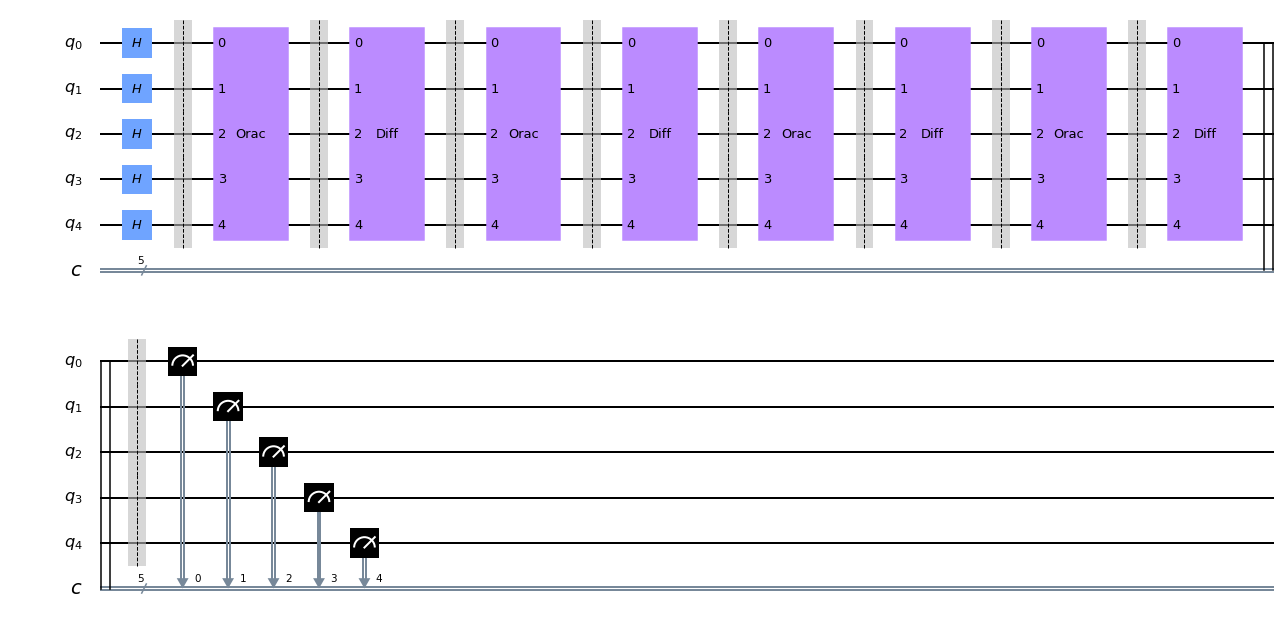

In [4]:
nq = 5
marked_basis_state_indices = [27]
ntrials = 4;
print(f'{nq} qubits, basis state indices {marked_basis_state_indices} marked, {ntrials} trials')

snapshot_index = 1
mycircuit = QuantumCircuit(nq, nq)
mycircuit.h(range(nq))
mycircuit.snapshot(label=str(snapshot_index)); snapshot_index += 1
for _ in range(ntrials):
    mycircuit.append(get_oracle_circuit(marked_basis_state_indices, nq), qargs=mycircuit.qregs[0])
    mycircuit.snapshot(label=str(snapshot_index)); snapshot_index += 1
    mycircuit.append(get_diffusion_circuit(nq), qargs=mycircuit.qregs[0])
    mycircuit.snapshot(label=str(snapshot_index)); snapshot_index += 1
mycircuit.measure(range(nq), range(nq))
mycircuit.draw(output='mpl')

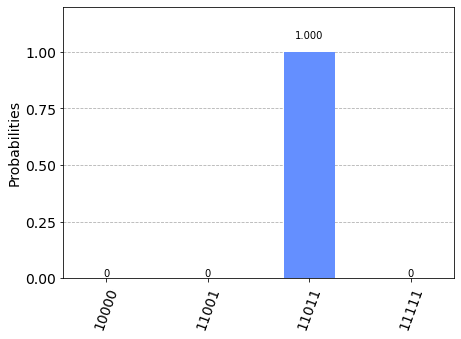

In [5]:
backend = Aer.get_backend('qasm_simulator')
result = execute(mycircuit, backend, shots=10000).result()
counts = result.get_counts(mycircuit)
plot_histogram(counts)

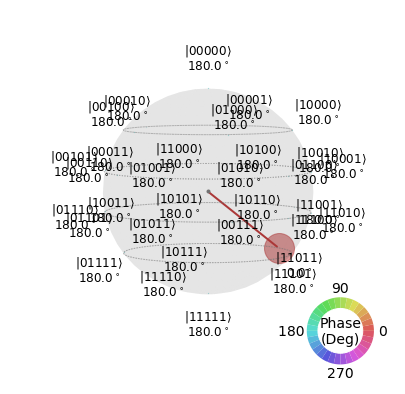

In [6]:
sv_index = 9
this_sv = result.data(0)['snapshots']['statevector'][str(sv_index)][0]
plot_state_qsphere(this_sv, use_degrees=True)